In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
dataset_path = "/content/drive/MyDrive/5Animals"

In [3]:
idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    #data augmentation
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

In [4]:
train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224, 224)
)

Found 1175 images belonging to 5 classes.


In [5]:
validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset="validation",
    target_size=(224, 224)
)

Found 128 images belonging to 5 classes.


In [6]:
from keras.api._v2.keras import activations
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(234, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [7]:
from keras.src.engine.training import optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)

Epoch 1/20
37/37 [==============================] - 416s 11s/step - loss: 1.6475 - accuracy: 0.3183 - val_loss: 1.4489 - val_accuracy: 0.3594
Epoch 2/20
37/37 [==============================] - 34s 903ms/step - loss: 1.2827 - accuracy: 0.4374 - val_loss: 1.2562 - val_accuracy: 0.4453
Epoch 3/20
37/37 [==============================] - 33s 892ms/step - loss: 1.1722 - accuracy: 0.4962 - val_loss: 1.3126 - val_accuracy: 0.4453
Epoch 4/20
37/37 [==============================] - 34s 924ms/step - loss: 1.1274 - accuracy: 0.5523 - val_loss: 1.1356 - val_accuracy: 0.5156
Epoch 5/20
37/37 [==============================] - 33s 892ms/step - loss: 0.9851 - accuracy: 0.6051 - val_loss: 1.0302 - val_accuracy: 0.5547
Epoch 6/20
37/37 [==============================] - 33s 884ms/step - loss: 0.8936 - accuracy: 0.6528 - val_loss: 1.1310 - val_accuracy: 0.5547
Epoch 7/20
37/37 [==============================] - 33s 894ms/step - loss: 0.8148 - accuracy: 0.6911 - val_loss: 1.0074 - val_accuracy: 0.6094


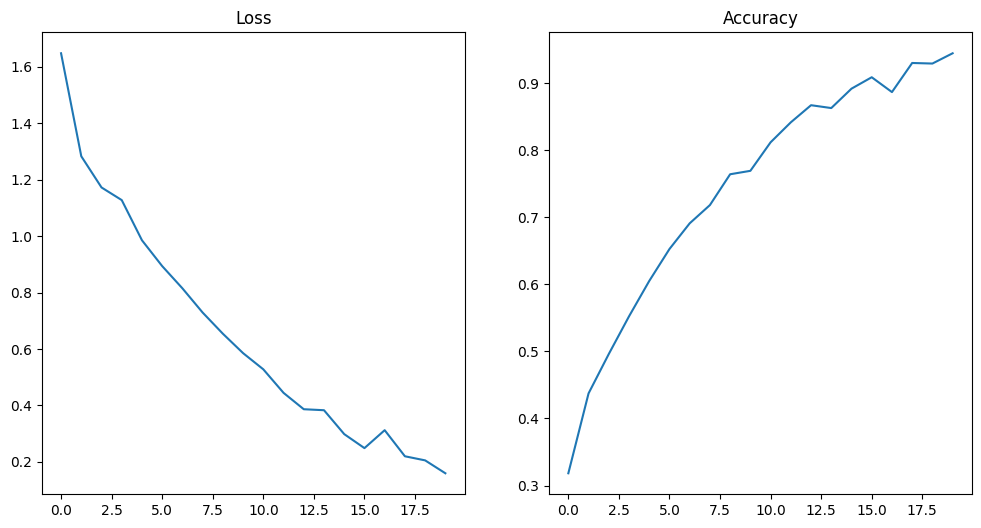

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()